In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Circle
import xclimate as xclim

In [2]:
cases = [
    "TSAxbin_TOTANNPRECTybin_dETmean",
    "PRDIFFxbin_TLAIybin_dETmean",
    "TSAxbin_TOTANNPRECTybin_dTLAImean",
]
all_bin = {}

rootdir = Path(f"/glade/work/bbuchovecky/et_controls/proc")
bin_timeagg = ["mean", "agg"]
bin_nbin = ["15", "25", "50", "75", "100"]
bin_time = "1995-2014"

for c in cases:
    all_bin[c] = {}
    for t in bin_timeagg:
        all_bin[c][t] = {}
        for nb in bin_nbin:
            print(f"qbin{nb}.{bin_time}.TIME{t}_{c}.*.nc")
            try:
                all_bin[c][t][nb] = xr.open_mfdataset(
                    list((rootdir / f"TIME{t}_{c}").glob(f"qbin{nb}.{bin_time}.TIME{t}_{c}.*.nc")),
                    combine="nested",
                    concat_dim="member",
                ).sortby("member")
            except ValueError:
                print("")
                continue

qbin15.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin25.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin50.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin75.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin100.1995-2014.TIMEmean_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin15.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin25.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin50.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin75.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin100.1995-2014.TIMEagg_TSAxbin_TOTANNPRECTybin_dETmean.*.nc
qbin15.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
qbin25.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
qbin50.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
qbin75.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
qbin100.1995-2014.TIMEmean_PRDIFFxbin_TLAIybin_dETmean.*.nc
qbin15.1995-2014.TIMEagg_PRDIFFxbin_TLAIybin_dETmean.*.nc
qbin25.1995-2014.TI

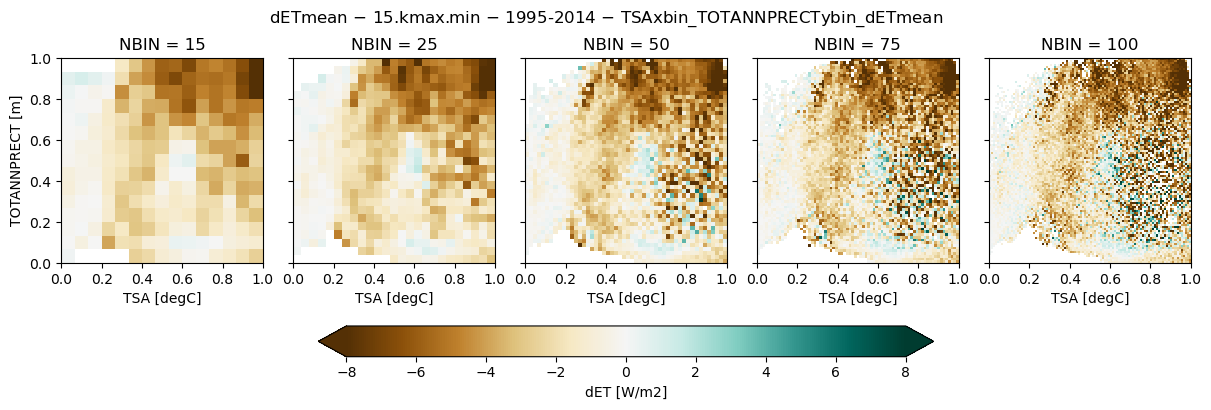

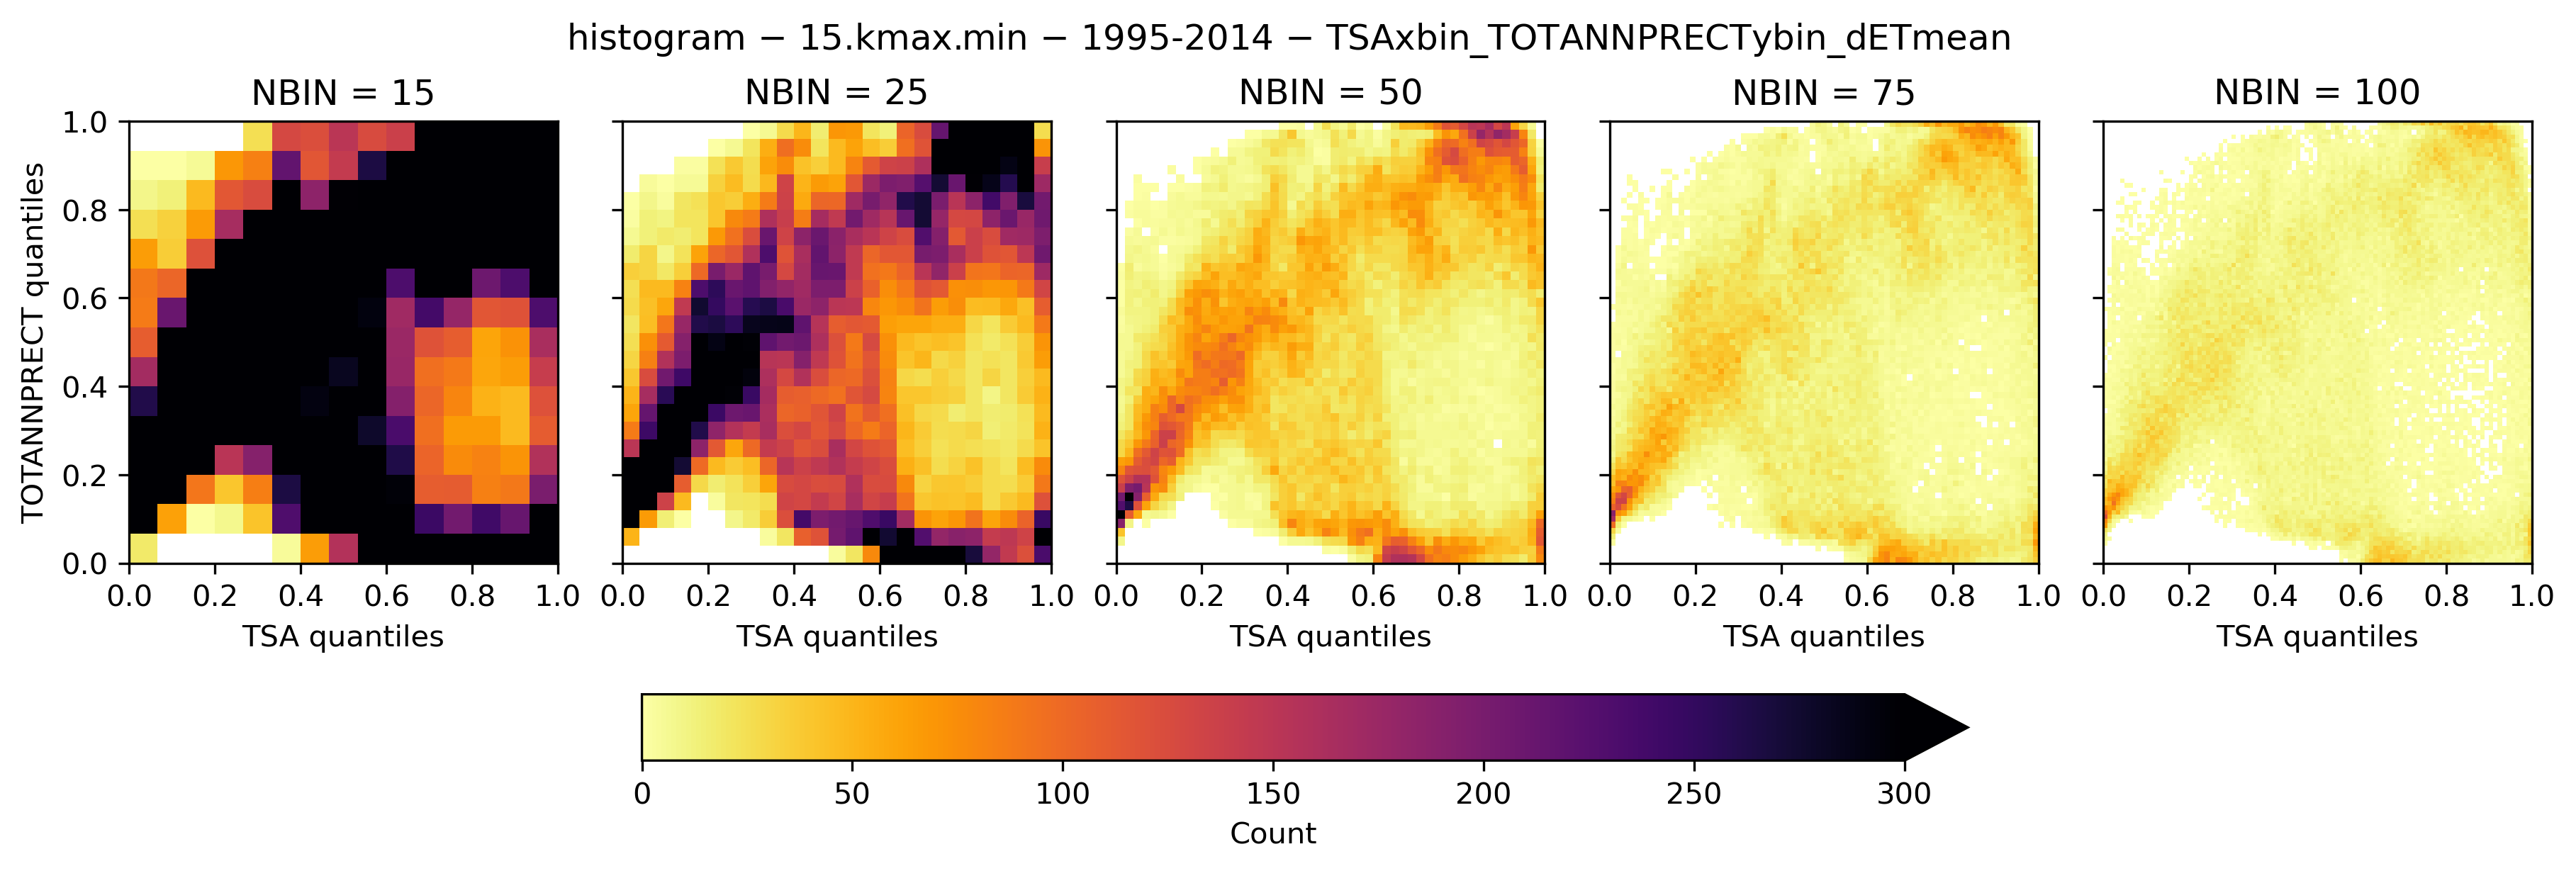

In [16]:
c = "TSAxbin_TOTANNPRECTybin_dETmean"
t = "agg"

bin = all_bin[c][t]
m = 15

ticks = np.arange(0, 1.1, 0.2)

fig, ax = plt.subplots(1, len(bin_nbin), figsize=(12, 4), sharex=True, sharey=True, layout="constrained", dpi=100)
for i, nbin in enumerate(bin_nbin):
    x = bin[nbin].x_qedge
    y = bin[nbin].y_qedge
    z = bin[nbin].binned_mean.sel(member=m)
    pcm = ax[i].pcolormesh(x, y, z, vmin=-8, vmax=8, cmap="BrBG")
    ax[i].set_title(f"NBIN = {nbin}")
    ax[i].set_xlabel("TSA [degC]")
    ax[i].set_xticks(ticks)
    ax[i].set_yticks(ticks)
ax[0].set_ylabel("TOTANNPRECT [m]")

fig.suptitle(f"dETmean $-$ {xclim.ppe.get_member_name(m)} $-$ {bin_time} $-$ {c}")
fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.08, aspect=20, label="dET [W/m2]", extend="both")

fig, ax = plt.subplots(1, len(bin_nbin), figsize=(12, 4), sharex=True, sharey=True, layout="constrained", dpi=300)
for i, nbin in enumerate(bin_nbin):
    x = bin[nbin].x_qedge
    y = bin[nbin].y_qedge
    z = bin[nbin].joint_hist.sel(member=m).where(bin[nbin].joint_hist.sel(member=m) > 0)
    # pcm = ax[i].pcolormesh(x, y, z, vmin=0, cmap="inferno_r")
    pcm = ax[i].pcolormesh(x, y, z, vmin=0, vmax=300, cmap="inferno_r")
    # pcm = ax[i].pcolormesh(x, y, z, norm=mcolors.LogNorm(vmin=1, vmax=100000), cmap="inferno_r")
    ax[i].set_title(f"NBIN = {nbin}")
    ax[i].set_xlabel("TSA quantiles")
    ax[i].set_xticks(ticks)
    ax[i].set_yticks(ticks)
ax[0].set_ylabel("TOTANNPRECT quantiles")
fig.suptitle(f"histogram $-$ {xclim.ppe.get_member_name(m)} $-$ {bin_time} $-$ {c}")
cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.08, aspect=20, label="Count", extend="max")
# cb.set_ticks([0])

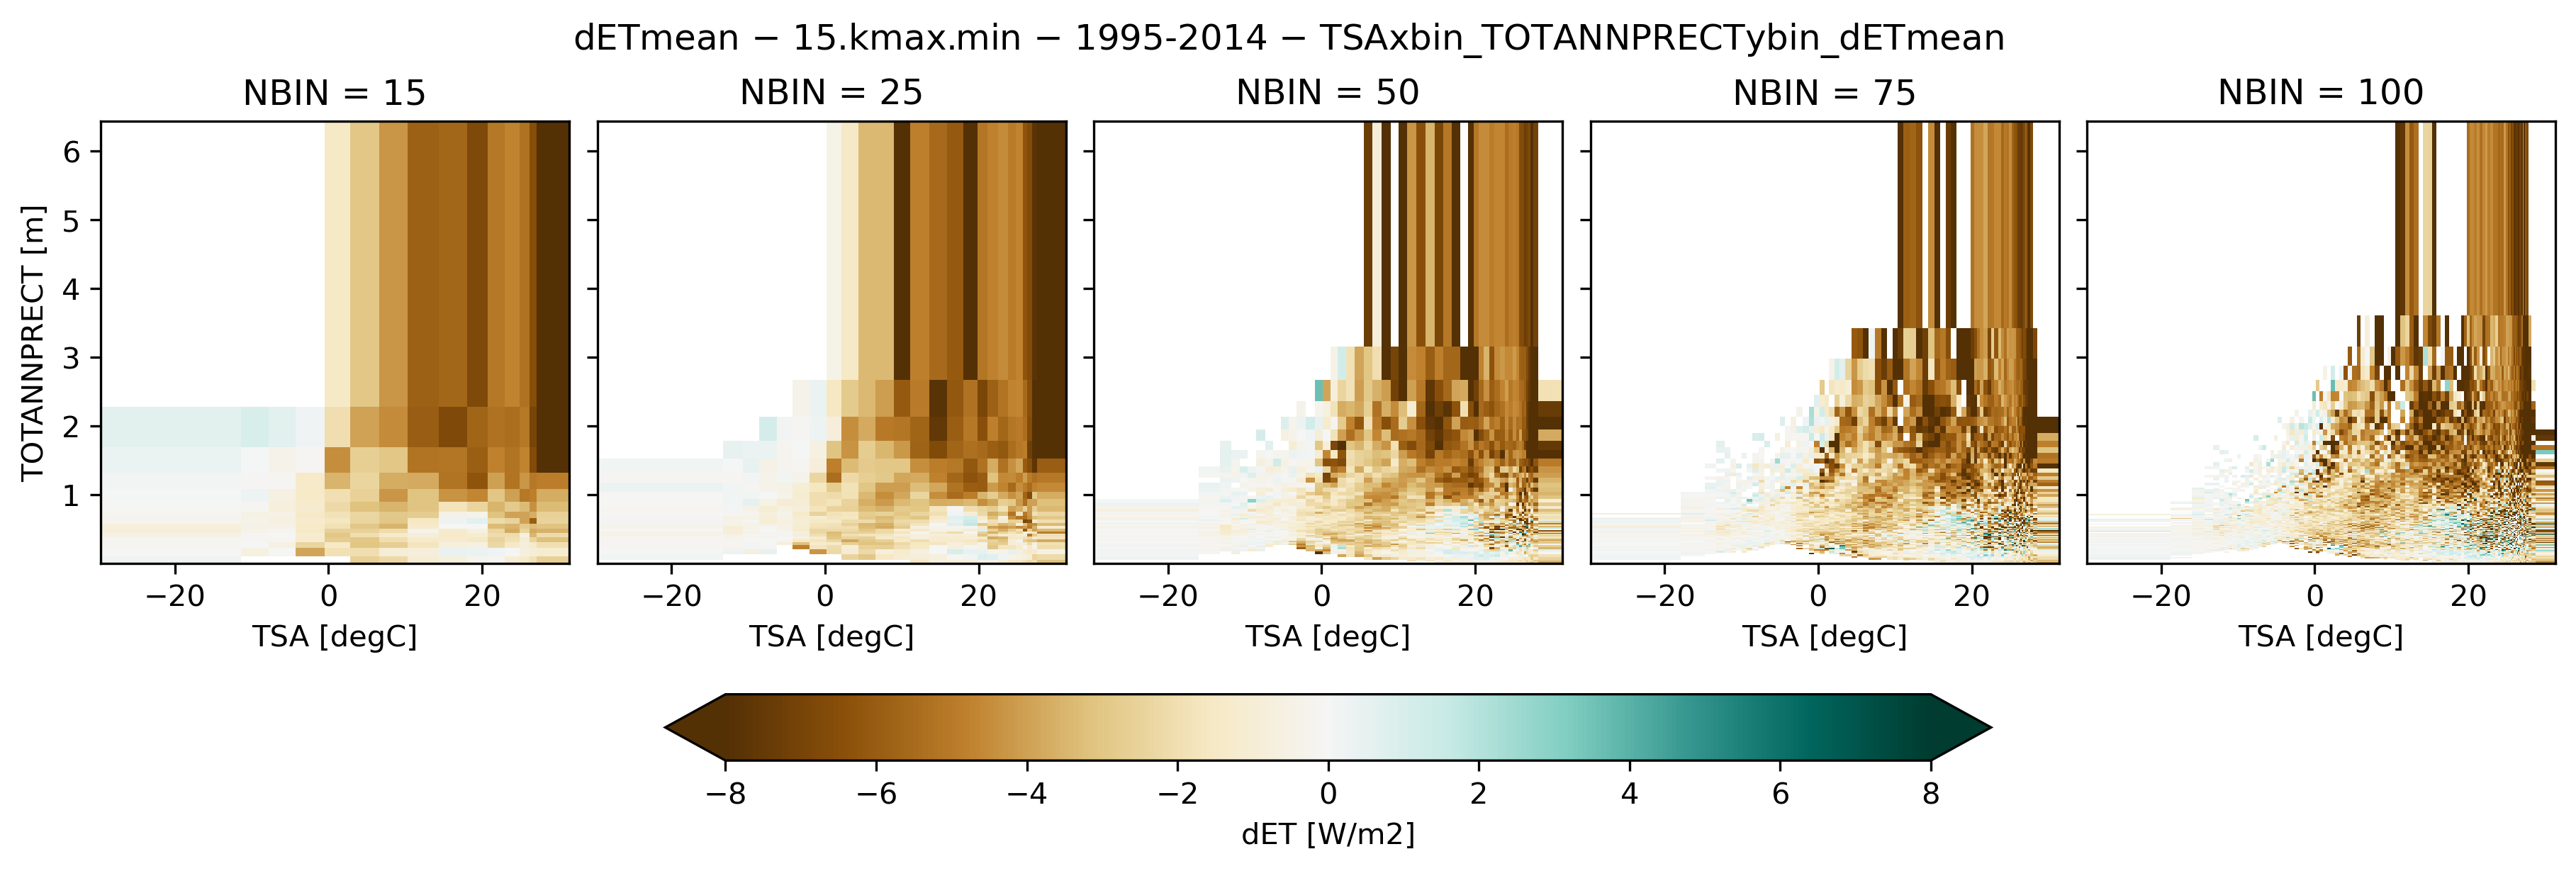

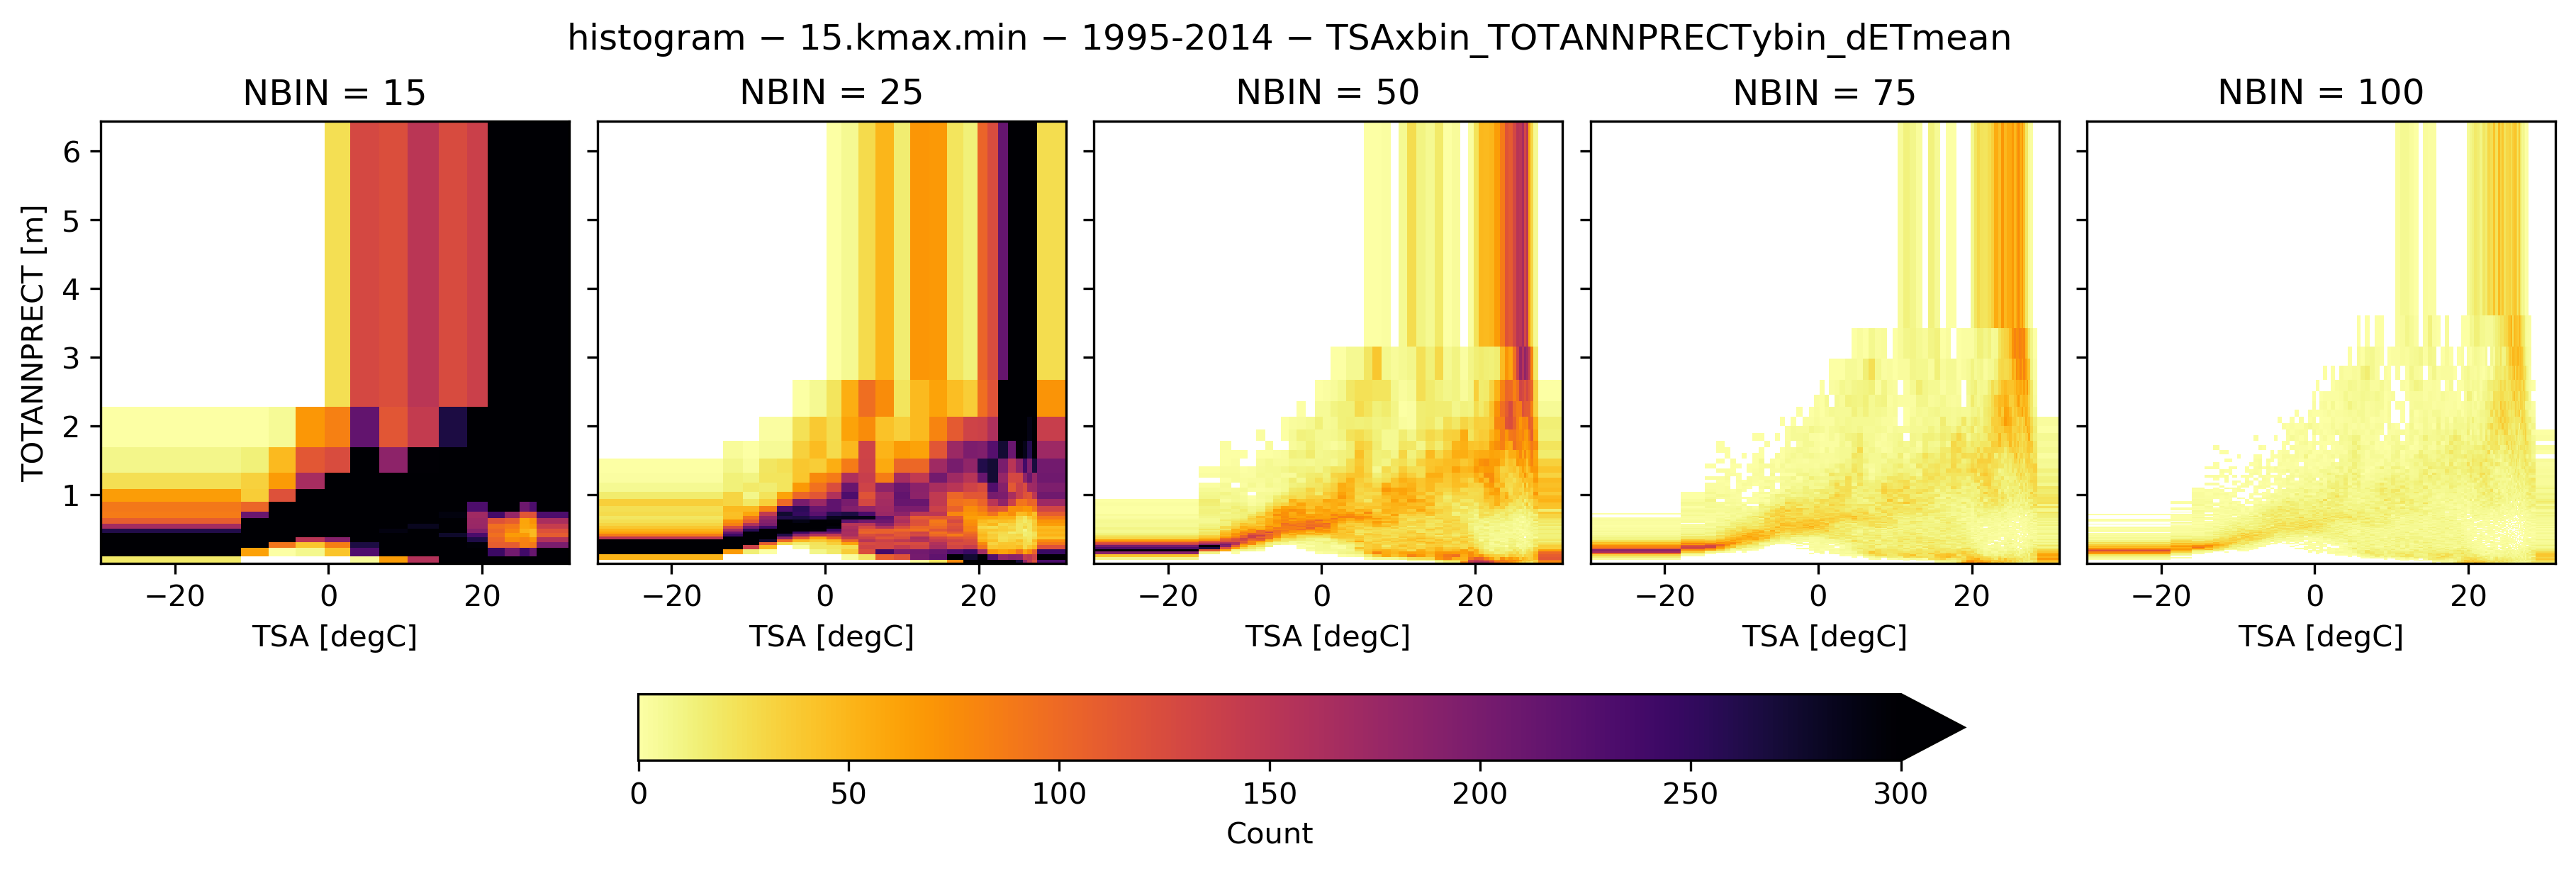

In [17]:
c = "TSAxbin_TOTANNPRECTybin_dETmean"
t = "agg"

bin = all_bin[c][t]
m = 15

fig, ax = plt.subplots(1, len(bin_nbin), figsize=(12, 4), sharex=True, sharey=True, layout="constrained", dpi=300)
for i, nbin in enumerate(bin_nbin):
    x = bin[nbin].xb_qedge.sel(member=m)
    y = bin[nbin].yb_qedge.sel(member=m) / 1e3
    z = bin[nbin].binned_mean.sel(member=m)
    pcm = ax[i].pcolormesh(x, y, z, vmin=-8, vmax=8, cmap="BrBG")
    ax[i].set_title(f"NBIN = {nbin}")
    ax[i].set_xlabel("TSA [degC]")
ax[0].set_ylabel("TOTANNPRECT [m]")

fig.suptitle(f"dETmean $-$ {xclim.ppe.get_member_name(m)} $-$ {bin_time} $-$ {c}")
fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.08, aspect=20, label="dET [W/m2]", extend="both")

fig, ax = plt.subplots(1, len(bin_nbin), figsize=(12, 4), sharex=True, sharey=True, layout="constrained", dpi=300)
for i, nbin in enumerate(bin_nbin):
    x = bin[nbin].xb_qedge.sel(member=m)
    y = bin[nbin].yb_qedge.sel(member=m) / 1e3
    z = bin[nbin].joint_hist.sel(member=m).where(bin[nbin].joint_hist.sel(member=m) > 0)
    # pcm = ax[i].pcolormesh(x, y, z, vmin=0, cmap="inferno_r")
    pcm = ax[i].pcolormesh(x, y, z, vmin=0, vmax=300, cmap="inferno_r")
    # pcm = ax[i].pcolormesh(x, y, z, norm=mcolors.LogNorm(vmin=1, vmax=100000), cmap="inferno_r")
    ax[i].set_title(f"NBIN = {nbin}")
    ax[i].set_xlabel("TSA [degC]")
ax[0].set_ylabel("TOTANNPRECT [m]")
fig.suptitle(f"histogram $-$ {xclim.ppe.get_member_name(m)} $-$ {bin_time} $-$ {c}")
cb = fig.colorbar(pcm, ax=ax, orientation="horizontal", pad=0.08, aspect=20, label="Count", extend="max")
# cb.set_ticks([0])

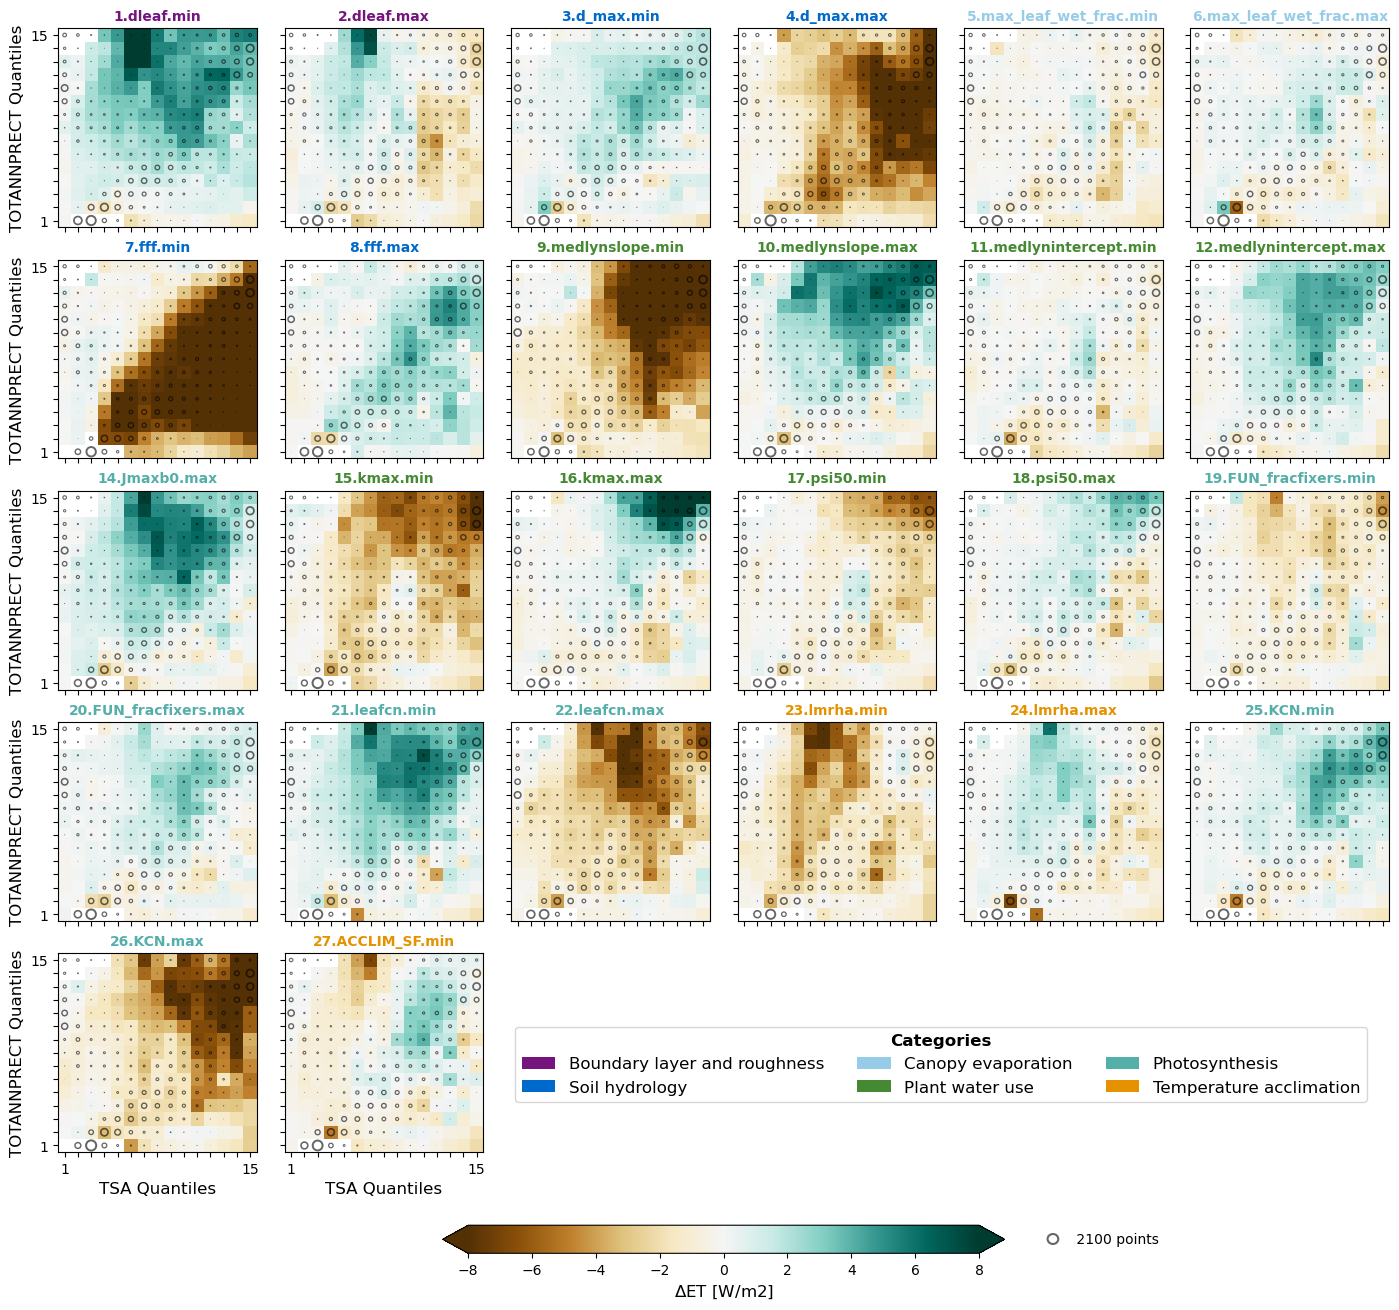

In [3]:
c = "TSAxbin_TOTANNPRECTybin_dETmean"
t = "agg"

bin = all_bin[c][t]
nb = 15

bm_data = bin[str(nb)].binned_mean
jh_data = bin[str(nb)].joint_hist
vabs = 8

ref_count = round(jh_data.max().values.item() / 1e2, 0) * 1e2
radius_scalar = 0.4
lw_scalar = 0.5
line_alpha = 0.6

ncols = 6
nrows = 5

fig, axs = plt.subplots(
    ncols=ncols, nrows=nrows,
    sharex=True, sharey=True,
    figsize=(14, 13),
    subplot_kw=dict(box_aspect=1),
    constrained_layout=True,
    dpi=100,
)
ax = axs.flatten()

pcm = None
for i, m in enumerate(bm_data.member.values):
    pcm = ax[i].pcolormesh(bm_data.sel(member=m), shading="auto", cmap="BrBG", vmin=-vabs, vmax=vabs)

    m_jh_data = jh_data.sel(member=m)
    for ii in range(len(jh_data.ix_bin)):
        for jj in range(len(jh_data.iy_bin)):
            count = m_jh_data.values[ii, jj]
            if count > 0:
                radius = radius_scalar * (count / ref_count)
                lw = lw_scalar + (count / ref_count)
                circle = Circle(
                    (ii + 0.5, jj + 0.5),
                    radius,
                    fill=False,
                    edgecolor="black",
                    linewidth=lw,
                    alpha=line_alpha,
                )
                ax[i].add_patch(circle)

    ax[i].set_title(
        xclim.ppe.get_member_name(m),
        color=xclim.ppe.get_member_cat_color(m),
        fontsize=10,
        fontweight="bold",
        )
    ax[i].set_xlim(0, len(bm_data.ix_bin))
    ax[i].set_ylim(0, len(bm_data.iy_bin))

    ax[i].set_yticks(np.arange(nb) + 0.5)
    ax[i].set_xticks(np.arange(nb) + 0.5)

    ticklabels = np.full((nb), "", dtype=object)
    ticklabels[0] = "1"
    ticklabels[-1] = str(nb)

    ax[i].set_yticklabels(ticklabels)
    ax[i].set_xticklabels(ticklabels)

    if i % ncols == 0:
        ax[i].set_ylabel("TOTANNPRECT Quantiles", fontsize=12)
    if i // ncols == nrows - 1:
        ax[i].set_xlabel("TSA Quantiles", fontsize=12)

# Add colorbar below all subplots
cbar = fig.colorbar(
    pcm,
    ax=axs,
    orientation="horizontal",
    extend="both",
    fraction=0.025,
    shrink=0.9,
    pad=0.025,
)
cbar.set_label("$\\Delta$ET [W/m2]", fontsize=12)

for i in range(len(bm_data.member), ncols * nrows):
    ax[i].remove()



# Create custom legend for member categories
# Get unique categories and their colors
categories = {}
for m in bm_data.member.values:
    cat = xclim.ppe.get_member_cat_name(m)
    color = xclim.ppe.get_member_cat_color(m)
    if cat not in categories:
        categories[cat] = color

# Create legend handles
legend_handles = [Patch(facecolor=color, label=cat) for cat, color in categories.items()]

# Add legend using figure coordinates
legend = fig.legend(
    handles=legend_handles,
    ncols=3,
    loc='lower right',
    bbox_to_anchor=(0.98, 0.15),
    bbox_transform=fig.transFigure,
    frameon=True,
    fontsize=12,
    title="Categories",
    title_fontproperties={
        "weight": "bold",
        "size": 12,
    }
)



# Add scale circle to the right of colorbar
scale_count = ref_count
scale_lw = lw_scalar + (scale_count / ref_count)

fig.canvas.draw()

# Get colorbar position
cbar_pos = cbar.ax.get_position()

# Position to the right of colorbar in figure coordinates
scale_x = cbar_pos.x1 + 0.05  # 0.05 figure units to the right
scale_y = (cbar_pos.y0 + cbar_pos.y1) / 2  # vertically centered

# Convert data radius to figure coordinates using transform pipeline
data_radius = radius_scalar * (scale_count / ref_count)  # radius in data coordinates
# Transform from data coordinates to display (pixel) coordinates, then to figure coordinates
point_data = np.array([[0, 0], [data_radius, 0]])  # origin and point at radius distance
point_display = ax[0].transData.transform(point_data)
point_figure = fig.transFigure.inverted().transform(point_display)
scale_radius = np.linalg.norm(point_figure[1] - point_figure[0])  # distance in figure units

scale_circle = Circle(
    (scale_x, scale_y),
    scale_radius,
    fill=False,
    edgecolor="black",
    linewidth=scale_lw,
    alpha=0.6,
    clip_on=False,
    transform=fig.transFigure,
)
fig.add_artist(scale_circle)

fig.text(
    scale_x + scale_radius + 0.01,
    scale_y,
    f"{int(scale_count): d} points",
    ha="left",
    va="center",
    fontsize=10,
    transform=fig.transFigure,
)

fig.savefig(f"TIME{t}_{c}.png", dpi=300)

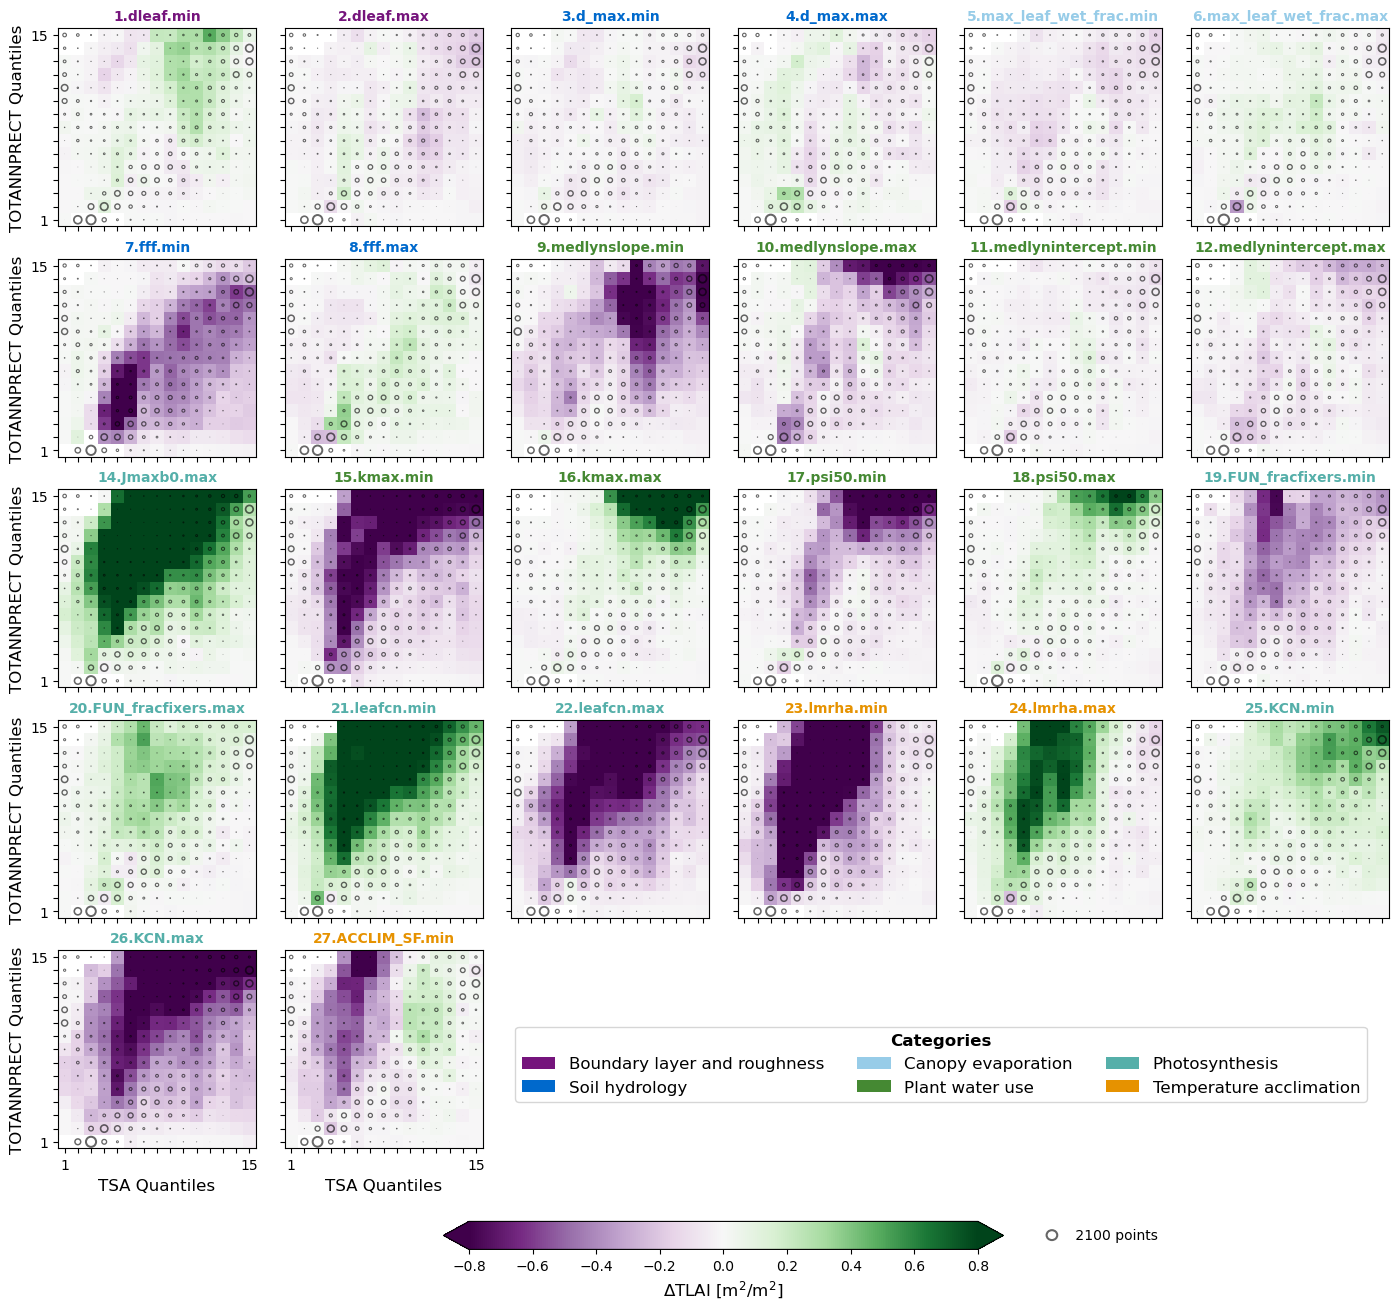

In [7]:
c = "TSAxbin_TOTANNPRECTybin_dTLAImean"
t = "agg"

bin = all_bin[c][t]
nb = 15

bm_data = bin[str(nb)].binned_mean
jh_data = bin[str(nb)].joint_hist
vabs = 0.8

ref_count = round(jh_data.max().values.item() / 1e2, 0) * 1e2
radius_scalar = 0.4
lw_scalar = 0.5
line_alpha = 0.6

ncols = 6
nrows = 5

fig, axs = plt.subplots(
    ncols=ncols, nrows=nrows,
    sharex=True, sharey=True,
    figsize=(14, 13),
    subplot_kw=dict(box_aspect=1),
    constrained_layout=True,
    dpi=100,

)
ax = axs.flatten()

pcm = None
for i, m in enumerate(bm_data.member.values):
    pcm = ax[i].pcolormesh(bm_data.sel(member=m), shading="auto", cmap="PRGn", vmin=-vabs, vmax=vabs)

    m_jh_data = jh_data.sel(member=m)
    for ii in range(len(jh_data.ix_bin)):
        for jj in range(len(jh_data.iy_bin)):
            count = m_jh_data.values[ii, jj]
            if count > 0:
                radius = radius_scalar * (count / ref_count)
                lw = lw_scalar + (count / ref_count)
                circle = Circle(
                    (ii + 0.5, jj + 0.5),
                    radius,
                    fill=False,
                    edgecolor="black",
                    linewidth=lw,
                    alpha=line_alpha,
                )
                ax[i].add_patch(circle)

    ax[i].set_title(
        xclim.ppe.get_member_name(m),
        color=xclim.ppe.get_member_cat_color(m),
        fontsize=10,
        fontweight="bold",
    )
    ax[i].set_xlim(0, len(bm_data.ix_bin))
    ax[i].set_ylim(0, len(bm_data.iy_bin))

    ax[i].set_yticks(np.arange(nb) + 0.5)
    ax[i].set_xticks(np.arange(nb) + 0.5)

    ticklabels = np.full((nb), "", dtype=object)
    ticklabels[0] = "1"
    ticklabels[-1] = str(nb)

    ax[i].set_yticklabels(ticklabels)
    ax[i].set_xticklabels(ticklabels)

    if i % ncols == 0:
        ax[i].set_ylabel("TOTANNPRECT Quantiles", fontsize=12)
    if i // ncols == nrows - 1:
        ax[i].set_xlabel("TSA Quantiles", fontsize=12)



# Add colorbar below all subplots
cbar = fig.colorbar(
    pcm,
    ax=axs,
    orientation="horizontal",
    extend="both",
    fraction=0.025,
    shrink=0.9,
    pad=0.025,
)
cbar.set_label("$\\Delta$TLAI [m$^2$/m$^2$]", fontsize=12)

for i in range(len(bm_data.member), ncols * nrows):
    ax[i].remove()




# Create custom legend for member categories
# Get unique categories and their colors
categories = {}
for m in bm_data.member.values:
    cat = xclim.ppe.get_member_cat_name(m)
    color = xclim.ppe.get_member_cat_color(m)
    if cat not in categories:
        categories[cat] = color

# Create legend handles
legend_handles = [Patch(facecolor=color, label=cat) for cat, color in categories.items()]

# Add legend using figure coordinates
legend = fig.legend(
    handles=legend_handles,
    ncols=3,
    loc='lower right',
    bbox_to_anchor=(0.98, 0.15),
    bbox_transform=fig.transFigure,
    frameon=True,
    fontsize=12,
    title="Categories",
    title_fontproperties={
        "weight": "bold",
        "size": 12,
    }
)



# Add scale circle to the right of colorbar
scale_count = ref_count
scale_lw = lw_scalar + (scale_count / ref_count)

fig.canvas.draw()

# Get colorbar position
cbar_pos = cbar.ax.get_position()

# Position to the right of colorbar in figure coordinates
scale_x = cbar_pos.x1 + 0.05  # 0.05 figure units to the right
scale_y = (cbar_pos.y0 + cbar_pos.y1) / 2  # vertically centered

# Convert data radius to figure coordinates using transform pipeline
data_radius = radius_scalar * (scale_count / ref_count)  # radius in data coordinates
# Transform from data coordinates to display (pixel) coordinates, then to figure coordinates
point_data = np.array([[0, 0], [data_radius, 0]])  # origin and point at radius distance
point_display = ax[0].transData.transform(point_data)
point_figure = fig.transFigure.inverted().transform(point_display)
scale_radius = np.linalg.norm(point_figure[1] - point_figure[0])  # distance in figure units

scale_circle = Circle(
    (scale_x, scale_y),
    scale_radius,
    fill=False,
    edgecolor="black",
    linewidth=scale_lw,
    alpha=0.6,
    clip_on=False,
    transform=fig.transFigure,
)
fig.add_artist(scale_circle)

fig.text(
    scale_x + scale_radius + 0.01,
    scale_y,
    f"{int(scale_count): d} points",
    ha="left",
    va="center",
    fontsize=10,
    transform=fig.transFigure,
)

fig.savefig(f"TIME{t}_{c}.png", dpi=300)

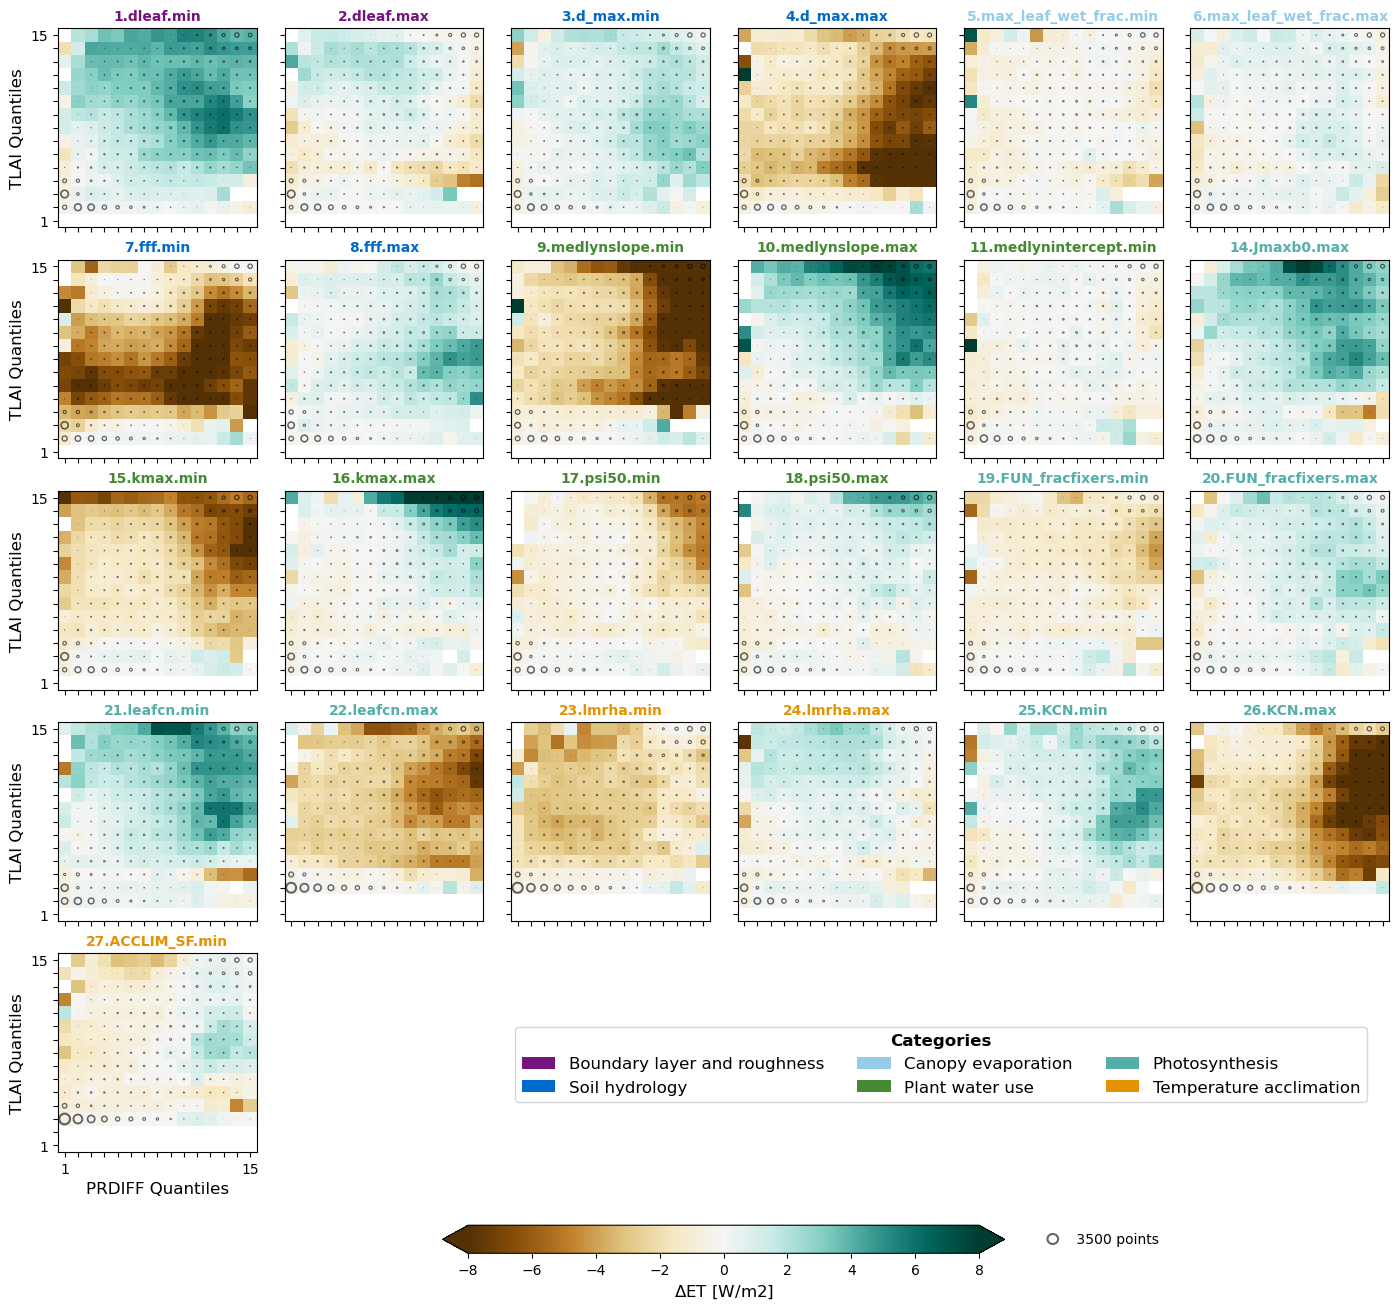

In [9]:
c = "PRDIFFxbin_TLAIybin_dETmean"
t = "agg"

bin = all_bin[c][t]
nb = 15

bm_data = bin[str(nb)].binned_mean
jh_data = bin[str(nb)].joint_hist.T
vabs = 8

ref_count = round(jh_data.max().values.item() / 1e2, 0) * 1e2
radius_scalar = 0.4
lw_scalar = 0.5
line_alpha = 0.6

ncols = 6
nrows = 5

fig, axs = plt.subplots(
    ncols=ncols, nrows=nrows,
    sharex=True, sharey=True,
    figsize=(14, 13),
    subplot_kw=dict(box_aspect=1),
    constrained_layout=True,
    dpi=100,
)
ax = axs.flatten()

pcm = None
for i, m in enumerate(bm_data.member.values):
    pcm = ax[i].pcolormesh(bm_data.sel(member=m), shading="auto", cmap="BrBG", vmin=-vabs, vmax=vabs)

    m_jh_data = jh_data.sel(member=m)
    for ii in range(len(jh_data.ix_bin)):
        for jj in range(len(jh_data.iy_bin)):
            count = m_jh_data.values[ii, jj]
            if count > 0:
                radius = radius_scalar * (count / ref_count)
                lw = lw_scalar + (count / ref_count)
                circle = Circle(
                    (ii + 0.5, jj + 0.5),
                    radius,
                    fill=False,
                    edgecolor="black",
                    linewidth=lw,
                    alpha=line_alpha,
                )
                ax[i].add_patch(circle)

    ax[i].set_title(
        xclim.ppe.get_member_name(m),
        color=xclim.ppe.get_member_cat_color(m),
        fontsize=10,
        fontweight="bold",
    )
    ax[i].set_xlim(0, len(bm_data.ix_bin))
    ax[i].set_ylim(0, len(bm_data.iy_bin))

    ax[i].set_yticks(np.arange(nb) + 0.5)
    ax[i].set_xticks(np.arange(nb) + 0.5)

    ticklabels = np.full((nb), "", dtype=object)
    ticklabels[0] = "1"
    ticklabels[-1] = str(nb)

    ax[i].set_yticklabels(ticklabels)
    ax[i].set_xticklabels(ticklabels)

    if i % ncols == 0:
        ax[i].set_ylabel("TLAI Quantiles", fontsize=12)
    if i // ncols == nrows - 1:
        ax[i].set_xlabel("PRDIFF Quantiles", fontsize=12)

# Add colorbar below all subplots
cbar = fig.colorbar(
    pcm,
    ax=axs,
    orientation="horizontal",
    extend="both",
    fraction=0.025,
    shrink=0.9,
    pad=0.025,
)
cbar.set_label("$\\Delta$ET [W/m2]", fontsize=12)

for i in range(len(bm_data.member), ncols * nrows):
    ax[i].remove()



# Create custom legend for member categories
# Get unique categories and their colors
categories = {}
for m in bm_data.member.values:
    cat = xclim.ppe.get_member_cat_name(m)
    color = xclim.ppe.get_member_cat_color(m)
    if cat not in categories:
        categories[cat] = color

# Create legend handles
legend_handles = [Patch(facecolor=color, label=cat) for cat, color in categories.items()]

# Add legend using figure coordinates
legend = fig.legend(
    handles=legend_handles,
    ncols=3,
    loc='lower right',
    bbox_to_anchor=(0.98, 0.15),
    bbox_transform=fig.transFigure,
    frameon=True,
    fontsize=12,
    title="Categories",
    title_fontproperties={
        "weight": "bold",
        "size": 12,
    }
)



# Add scale circle to the right of colorbar
scale_count = ref_count
scale_lw = lw_scalar + (scale_count / ref_count)

fig.canvas.draw()

# Get colorbar position
cbar_pos = cbar.ax.get_position()

# Position to the right of colorbar in figure coordinates
scale_x = cbar_pos.x1 + 0.05  # 0.05 figure units to the right
scale_y = (cbar_pos.y0 + cbar_pos.y1) / 2  # vertically centered

# Convert data radius to figure coordinates using transform pipeline
data_radius = radius_scalar * (scale_count / ref_count)  # radius in data coordinates
# Transform from data coordinates to display (pixel) coordinates, then to figure coordinates
point_data = np.array([[0, 0], [data_radius, 0]])  # origin and point at radius distance
point_display = ax[0].transData.transform(point_data)
point_figure = fig.transFigure.inverted().transform(point_display)
scale_radius = np.linalg.norm(point_figure[1] - point_figure[0])  # distance in figure units

scale_circle = Circle(
    (scale_x, scale_y),
    scale_radius,
    fill=False,
    edgecolor="black",
    linewidth=scale_lw,
    alpha=0.6,
    clip_on=False,
    transform=fig.transFigure,
)
fig.add_artist(scale_circle)

fig.text(
    scale_x + scale_radius + 0.01,
    scale_y,
    f"{int(scale_count): d} points",
    ha="left",
    va="center",
    fontsize=10,
    transform=fig.transFigure,
)

fig.savefig(f"TIME{t}_{c}.png", dpi=300)

Text(0.7645724944773012, 0.04937509094274983, ' 200 points')

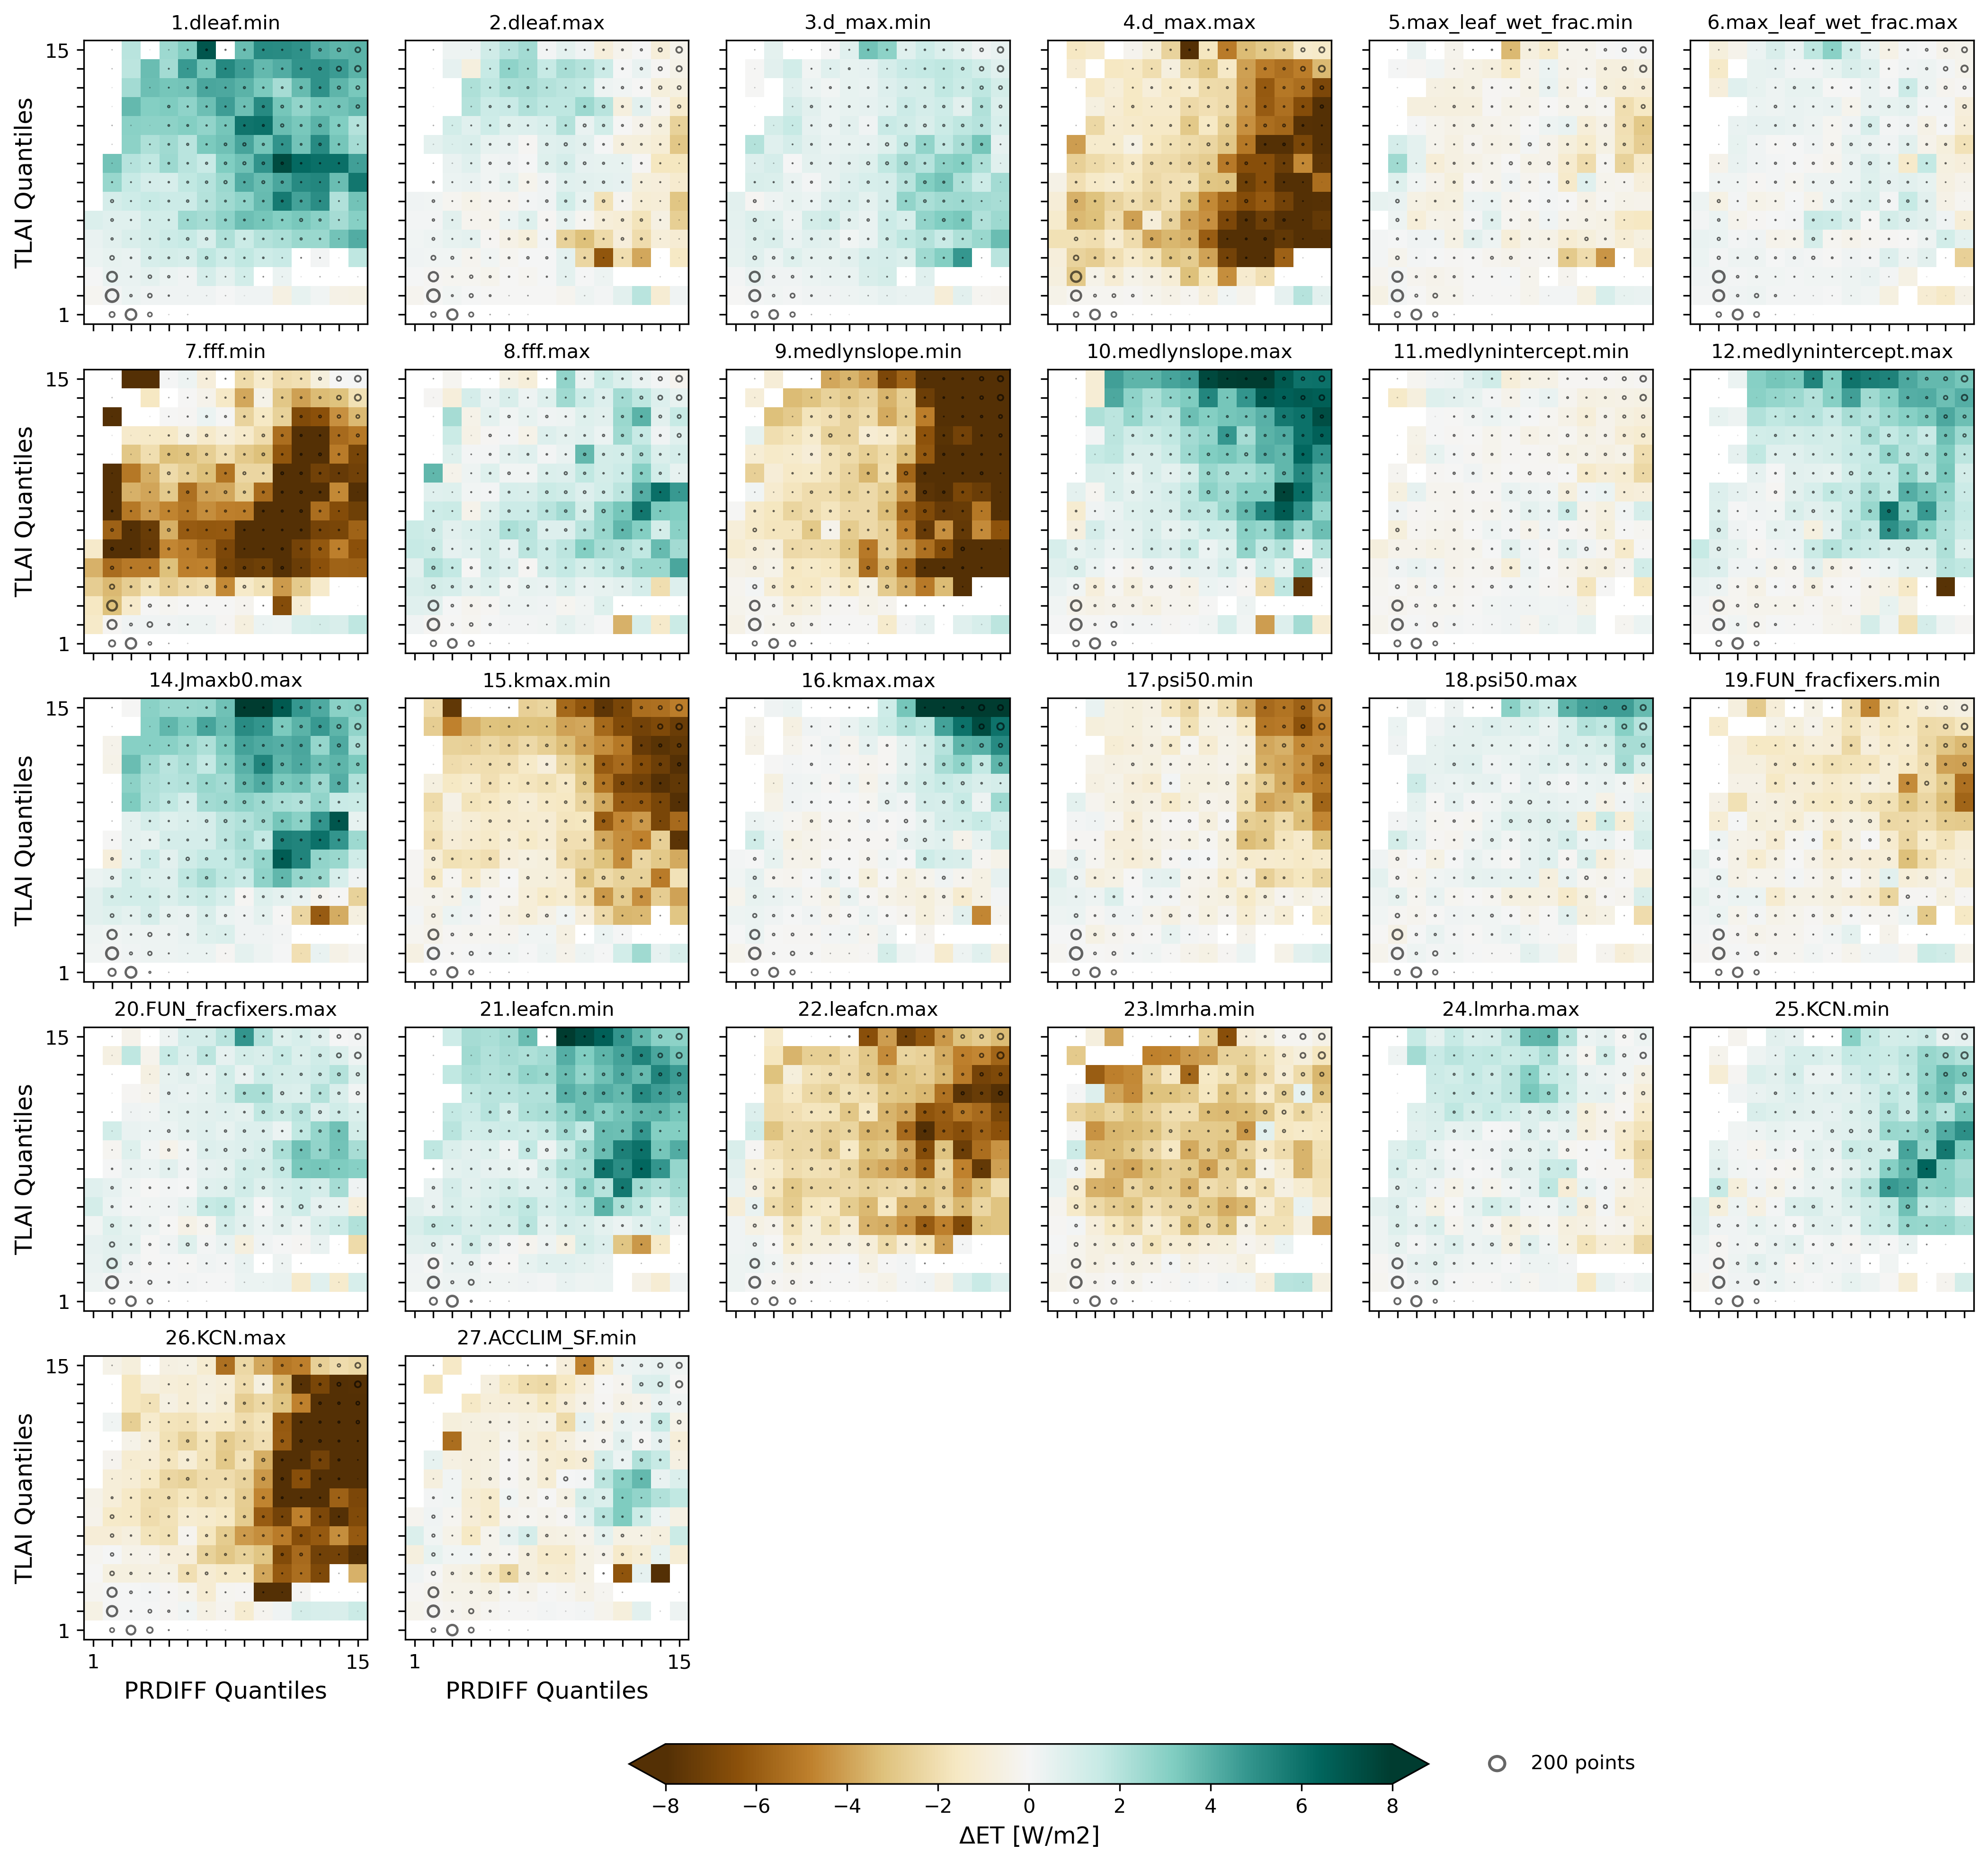

In [ ]:
c = "PRDIFFxbin_TLAIybin_dETmean"
t = "mean"

bin = all_bin[c][t]
nb = 15

bm_data = bin[str(nb)].binned_mean
jh_data = bin[str(nb)].joint_hist
vabs = 8

ref_count = round(jh_data.max().values.item() / 1e2, 0) * 1e2
radius_scalar = 0.4
lw_scalar = 0.5
line_alpha = 0.6

ncols = 6
nrows = 5

fig, axs = plt.subplots(
    ncols=ncols, nrows=nrows,
    sharex=True, sharey=True,
    figsize=(14, 13),
    subplot_kw=dict(box_aspect=1),
    constrained_layout=True,
    dpi=300,
)
ax = axs.flatten()

pcm = None
for i, m in enumerate(bm_data.member.values):
    pcm = ax[i].pcolormesh(bm_data.sel(member=m), shading="auto", cmap="BrBG", vmin=-vabs, vmax=vabs)

    m_jh_data = jh_data.sel(member=m)
    for ii in range(len(jh_data.ix_bin)):
        for jj in range(len(jh_data.iy_bin)):
            count = m_jh_data.values[ii, jj]
            if count > 0:
                radius = radius_scalar * (count / ref_count)
                lw = lw_scalar + (count / ref_count)
                circle = Circle(
                    (ii + 0.5, jj + 0.5),
                    radius,
                    fill=False,
                    edgecolor="black",
                    linewidth=lw,
                    alpha=line_alpha,
                )
                ax[i].add_patch(circle)

    ax[i].set_title(xclim.ppe.get_member_name(m), fontsize=10)
    ax[i].set_xlim(0, len(bm_data.ix_bin))
    ax[i].set_ylim(0, len(bm_data.iy_bin))

    ax[i].set_yticks(np.arange(nb) + 0.5)
    ax[i].set_xticks(np.arange(nb) + 0.5)

    ticklabels = np.full((nb), "", dtype=object)
    ticklabels[0] = "1"
    ticklabels[-1] = str(nb)

    ax[i].set_yticklabels(ticklabels)
    ax[i].set_xticklabels(ticklabels)

    if i % ncols == 0:
        ax[i].set_ylabel("TLAI Quantiles", fontsize=12)
    if i // ncols == nrows - 1:
        ax[i].set_xlabel("PRDIFF Quantiles", fontsize=12)

# Add colorbar below all subplots
cbar = fig.colorbar(
    pcm,
    ax=axs,
    orientation="horizontal",
    extend="both",
    fraction=0.025,
    shrink=0.9,
    pad=0.025,
)
cbar.set_label("$\\Delta$ET [W/m2]", fontsize=12)

for i in range(len(bm_data.member), ncols * nrows):
    ax[i].remove()

# Add scale circle to the right of colorbar
scale_count = ref_count
scale_lw = lw_scalar + (scale_count / ref_count)

fig.canvas.draw()

# Get colorbar position
cbar_pos = cbar.ax.get_position()

# Position to the right of colorbar in figure coordinates
scale_x = cbar_pos.x1 + 0.05  # 0.05 figure units to the right
scale_y = (cbar_pos.y0 + cbar_pos.y1) / 2  # vertically centered

# Convert data radius to figure coordinates using transform pipeline
data_radius = radius_scalar * (scale_count / ref_count)  # radius in data coordinates
# Transform from data coordinates to display (pixel) coordinates, then to figure coordinates
point_data = np.array([[0, 0], [data_radius, 0]])  # origin and point at radius distance
point_display = ax[0].transData.transform(point_data)
point_figure = fig.transFigure.inverted().transform(point_display)
scale_radius = np.linalg.norm(point_figure[1] - point_figure[0])  # distance in figure units

scale_circle = Circle(
    (scale_x, scale_y),
    scale_radius,
    fill=False,
    edgecolor="black",
    linewidth=scale_lw,
    alpha=0.6,
    clip_on=False,
    transform=fig.transFigure,
)
fig.add_artist(scale_circle)

fig.text(
    scale_x + scale_radius + 0.01,
    scale_y,
    f"{int(scale_count): d} points",
    ha="left",
    va="center",
    fontsize=10,
    transform=fig.transFigure,
)